# Import libraries

In [2]:
import os
import math
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
%%shell
pip -q install --upgrade --no-cache-dir gdown
gdown -q 1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk
echo 'download: done => file: animals10small.zip'
rm -rf ./animals10small/
unzip -q animals10small.zip
echo 'Data files in: /content/animals10small/'

download: done => file: animals10small.zip
Data files in: /content/animals10small/


In [7]:
!rm -f bbc-fulltext.zip
!rm -rf bbc
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
!unzip -q bbc-fulltext.zip

--2024-03-18 14:16:59--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874079 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  3.65MB/s    in 0.8s    

2024-03-18 14:17:00 (3.65 MB/s) - ‘bbc-fulltext.zip’ saved [2874079/2874079]



# Q.1 - Show arrays's attributes
* Requirements:
  * Fill code to the following code cells, after **#YOUR CODE IS HERE**, to show the arrays' attributes as shown in the output followed.
  

In [5]:
X = np.array([10, 20, 5, 15, 8])
#YOUR CODE IS HERE
print(f"Type of X, type(X): {type(X)}")
print(f"Shape of X, X.shape: {X.shape}")
print(f"Element's type, X.dtype: {X.dtype}")
print(f"Num of dimensions, X.ndim: {X.ndim}")


Type of X, type(X): <class 'numpy.ndarray'>
Shape of X, X.shape: (5,)
Element's type, X.dtype: int64
Num of dimensions, X.ndim: 1


In [ ]:
X = np.array([
    [10, 20, 3],
    [2, 2, 8]
])
#YOUR CODE IS HERE
print(f"Type of X, type(X): {type(X)}")
print(f"Shape of X, X.shape: {X.shape}")
print(f"Element's type, X.dtype: {X.dtype}")
print(f"Num of dimensions, X.ndim: {X.ndim}")



Type of X, type(X): <class 'numpy.ndarray'>
Shape of X, X.shape: (2, 3)
Element's type, X.dtype: int64
Num of dimensions, X.ndim: 2


# Q.2- Create arrays from lists | **Dataset: animals10small**

In [ ]:
# RUN THIS CELL TO CREATE LIST OF THE ANIMAL'S NAME
path_to_data = './animals10small/data'
class_names = sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.')])
print("List of the animal's names:\n", class_names)

class_counts = [ len(list(filter(lambda name: name.endswith(".jpg") or name.endswith(".jpeg"),
                                os.listdir(os.path.join(path_to_data, cname))
                                )
                          )
                    )
                for cname in class_names]
print("Number of files for each animal:\n", class_counts)

List of the animal's names:
 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of files for each animal:
 [95, 100, 100, 100, 100, 96, 100, 100, 100, 100]


## Q2.1- Create an array of the animal's names:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the animals' name shown in the output followed.


In [ ]:
# YOUR CODE IS HERE
print("Array of the animal's names:")
print(f"Type of X, type(X): {type(X)}")
print(f"Shape of X, X.shape: {X.shape}")
print(f"Element's type, X.dtype: {X.dtype}")
print(f"Num of dimensions, X.ndim: {X.ndim}")
idx2class = sorted([fname for fname in os.listdir('./animals10small/data') if not fname.startswith('.')])
print("Animal's names: idx2class:\n", idx2class)

Array of the animal's names:
Type of X, type(X): <class 'numpy.ndarray'>
Shape of X, X.shape: (2, 3)
Element's type, X.dtype: int64
Num of dimensions, X.ndim: 2
Animal's names: idx2class:
 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


## Q2.2- Create an array of the animal's counts:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the animals' counts shown in the output followed.

In [ ]:
# YOUR CODE IS HERE
class_counts = np.array(class_counts)
print(f"Type of class_counts, type(class_counts): {type(class_counts)}")
print(f"Num of dimensions, class_counts.ndim: {class_counts.ndim}")
print(class_counts)



Type of class_counts, type(class_counts): <class 'numpy.ndarray'>
Num of dimensions, class_counts.ndim: 1
[ 95 100 100 100 100  96 100 100 100 100]


## Q.2.3- Visualize the classes' distribution

### Q.2.3.1 Sample code
The cell followed contains code to show the distribution of fruits.

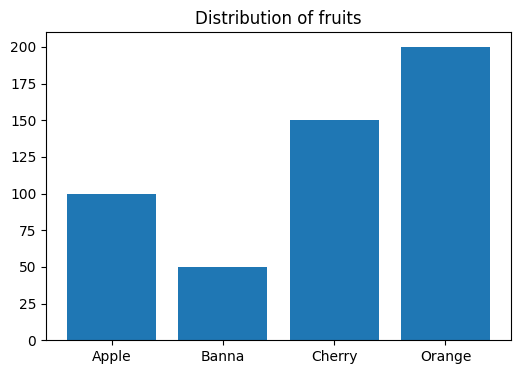

In [ ]:
values = np.array([100, 50, 150, 200])
labels = ["Apple", "Banna", "Cherry", "Orange"]

plt.figure(figsize=(6,4))
plt.bar(height=values, x=labels)
plt.title("Distribution of fruits")
plt.show()

### Q.2.3.2 Question
Fill code into the cell followed, after **#YOUR CODE IS HERE** to show the distribution of animals, as shown in the output cell followed

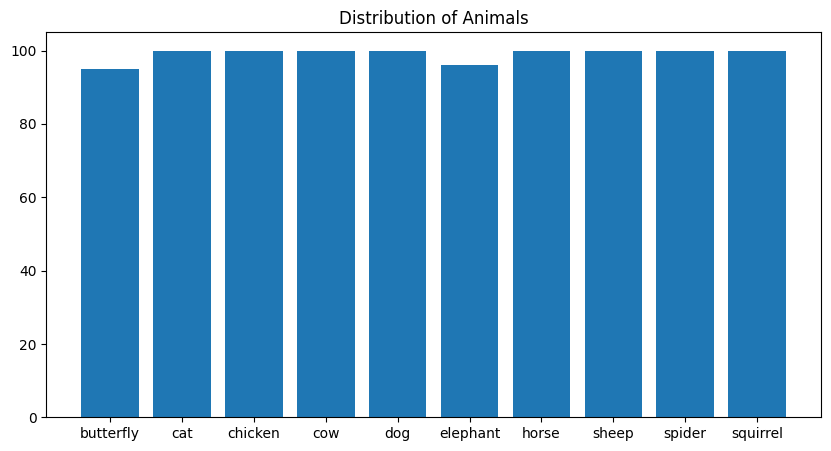

In [ ]:
# YOUR CODE IS HERE
values = class_counts
labels=class_names
plt.figure(figsize=(10,5))
plt.bar(height=values, x=labels)
plt.title("Distribution of Animals")
plt.show()

# Q.3- Create arrays from lists | **Dataset: BBC News**
* Requirements:
  * Fill code to the following cell to collect all the classes' name stored in variable **path_to_data**
    * NOTE-1: class-names are sub-folders of the folder specified in **path_to_data**
    * NOTE-2: your have to sort the classes' names ascendingly by alphabet-order
* Guideline:
  * Copy the idea from Section 2.
  * You can use ``os.path.isdir(name)`` to verify whether ``name`` a directory or not
  * You filter file names that ends with ".txt" instead of ".jpg" or ".jpeg" in Dataset **animals10small**


In [ ]:
path_to_data = './bbc'

# YOUR CODE IS HERE
class_names =list(filter(lambda dr: os.path.isdir(os.path.join(path_to_data, dr)), sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.')])))
print("List of the classes' name:\n", class_names)

class_counts = [ len(list(filter(lambda name: name.endswith(".txt"),
                                os.listdir(os.path.join(path_to_data, cname))
                                )
                          )
                    )
                for cname in class_names]
print("Number of files for each class:\n", class_counts)

List of the classes' name:
 ['business', 'entertainment', 'politics', 'sport', 'tech']
Number of files for each class:
 [510, 386, 417, 511, 401]


## Q3.1- Create an array of classes' name:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the classes' name shown in the output followed.


In [ ]:
# YOUR CODE IS HERE
idx2class = np.array(class_names)
print("Array of the classes' names:")
print(f"Type of idx2class, type(idx2class): {type(idx2class)}")
print(f"Shape of idx2class, idx2class.shape: {idx2class.shape}")
print(f"Element's type, idx2class.dtype.type: {idx2class.dtype.type}")
print(f"Num of dimensions, idx2class.ndim: {idx2class.ndim}")
print("Classes' names: idx2class:\n", idx2class)


Array of the classes' names:
Type of idx2class, type(idx2class): <class 'numpy.ndarray'>
Shape of idx2class, idx2class.shape: (5,)
Element's type, idx2class.dtype.type: <class 'numpy.str_'>
Num of dimensions, idx2class.ndim: 1
Classes' names: idx2class:
 ['business' 'entertainment' 'politics' 'sport' 'tech']


## Q2.2- Create an array of the classes' counts:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the classes' counts shown in the output followed.

In [ ]:
# YOUR CODE IS HERE
cl_c = np.array(class_counts)
print(f"type(class_counts): {type(cl_c)}")
print(f"class_counts.shape: {cl_c.shape}")
print(f"class_counts.dtype: {cl_c.dtype}")
print(f"class_counts: {cl_c}")


type(class_counts): <class 'numpy.ndarray'>
class_counts.shape: (5,)
class_counts.dtype: int64
class_counts: [510 386 417 511 401]


## Q.3.3- Visualize the distribution of news's type
Fill code into the cell followed, after **#YOUR CODE IS HERE** to show the distribution of news's type, as shown in the output cell followed

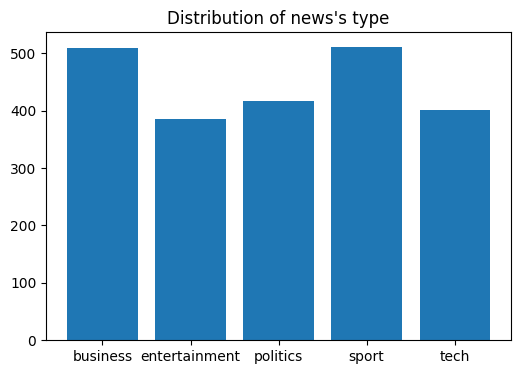

In [ ]:
# YOUR CODE IS HERE
values = cl_c
labels=idx2class
plt.figure(figsize=(6,4))
plt.bar(height=values, x=labels)
plt.title("Distribution of news's type")
plt.show()


# Q.4 - Explore a dataset
* Introduction to the dataset:
  * Name: Flower
  * Link: [https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz](https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz)
* Requrements:
  1. Download the dataset into your machine: use ``wget`` (see Section 0). You will have a file: **flower_photos.tgz**
  2. Decompress **flower_photos.tgz** to using command: ``tar -xzf flower_photos.tgz``
  3. Determine ``class_names`` and ``class_counts``, similar to Section 2 and 3.
  4. Show the class distribution

* Guideline:
  * Create sub-sections similar to Section 2 and 3 for your solutions

In [ ]:
# YOUR CODE IS HERE

!rm -f flower_photos.tgz
!rm -rf flower_photos
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xzf flower_photos.tgz
path_to_data = './flower_photos'

--2023-10-24 02:37:17--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 142.251.163.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   174MB/s    in 1.3s    

2023-10-24 02:37:19 (174 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
class_names =list(filter(lambda dr: os.path.isdir(os.path.join(path_to_data, dr)), sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.')])))
print("List of the classes' name:\n", class_names)

class_counts = [ len(list(filter(lambda name: name.endswith(".jpg") or name.endswith(".jpeg"),
                                os.listdir(os.path.join(path_to_data, cname))
                                )
                          )
                    )
                for cname in class_names]
print("Number of files for each class:\n", class_counts)

List of the classes' name:
 ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Number of files for each class:
 [633, 898, 641, 699, 799]


In [ ]:
idx2class = np.array(class_names)
print("Array of the classes' names:")
print(f"Type of idx2class, type(idx2class): {type(idx2class)}")
print(f"Shape of idx2class, idx2class.shape: {idx2class.shape}")
print(f"Element's type, idx2class.dtype.type: {idx2class.dtype.type}")
print(f"Num of dimensions, idx2class.ndim: {idx2class.ndim}")
print("Classes' names: idx2class:\n", idx2class)

Array of the classes' names:
Type of idx2class, type(idx2class): <class 'numpy.ndarray'>
Shape of idx2class, idx2class.shape: (5,)
Element's type, idx2class.dtype.type: <class 'numpy.str_'>
Num of dimensions, idx2class.ndim: 1
Classes' names: idx2class:
 ['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [ ]:
cl_c = np.array(class_counts)
print(f"type(class_counts): {type(cl_c)}")
print(f"class_counts.shape: {cl_c.shape}")
print(f"class_counts.dtype: {cl_c.dtype}")
print(f"class_counts: {cl_c}")

type(class_counts): <class 'numpy.ndarray'>
class_counts.shape: (5,)
class_counts.dtype: int64
class_counts: [633 898 641 699 799]


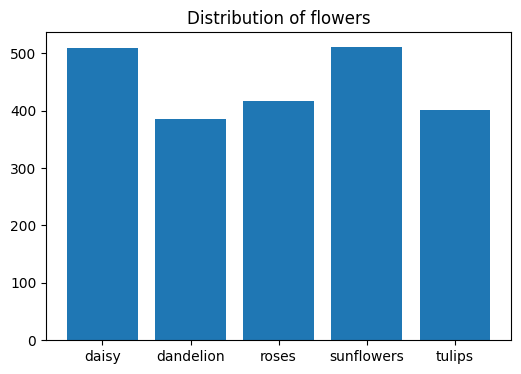

In [ ]:
values = cl_c
labels=idx2class
plt.figure(figsize=(6,4))
plt.bar(height=values, x=labels)
plt.title("Distribution of flowers")
plt.show()